In [316]:
## Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import seaborn as sns
import pandas as pd
import csv
import math
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn

In [317]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [318]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Antiviral Paper/Hybrid features-AVP.csv')

In [319]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()

# To scale data
scaler.fit(df)
print(df.shape)

(951, 200)


In [320]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [321]:
X = df.iloc[:, 0:198].values
y = df.iloc [:, 199].values
print(X.shape)
print(y.shape)

(951, 198)
(951,)


In [322]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
print (len(X_train),len(X_test),len(y_train),len(y_test))

760 191 760 191


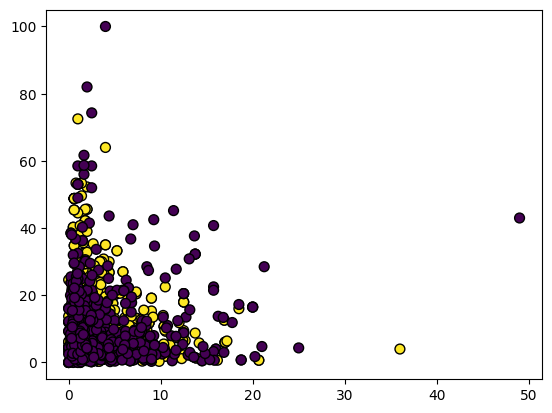

In [323]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");
plt.show()

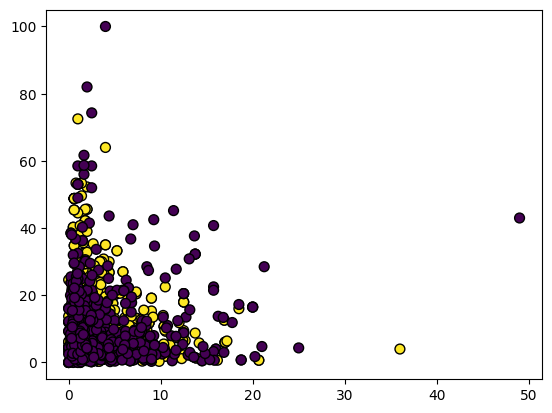

In [324]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");
plt.show()

In [325]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
print (len(X_train),len(X_test),len(y_train),len(y_test))

870 218 870 218


(1088, 198)
(1088,)


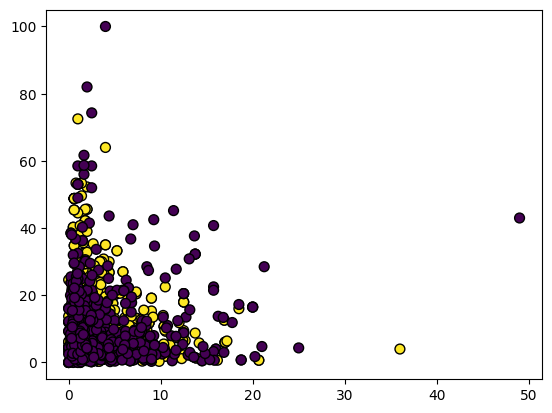

In [326]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print( X_res.shape)
print( y_res.shape)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");

In [327]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X_res, y_res, test_size = 0.2, random_state=42)
print (len(X_train),len(X_test),len(y_train),len(y_test))

870 218 870 218


In [328]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

Extra Tree Classifier

In [329]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, roc_auc_score, confusion_matrix

et = ExtraTreesClassifier(n_estimators=100,criterion='entropy',max_features='sqrt', random_state=5)  # Define classifier
et.fit(X_train, y_train)  # Train model

# Make predictions
y_train_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)

# Test set performance
et_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
et_test_mcc = matthews_corrcoef(y_test, y_test_pred)  # Calculate MCC
et_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
et_test_confusion = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
et_test_sensitivity = et_test_confusion[1, 1] / (et_test_confusion[1, 1] + et_test_confusion[1, 0])  # Sensitivity (True Positive Rate)
et_test_specificity = et_test_confusion[0, 0] / (et_test_confusion[0, 0] + et_test_confusion[0, 1])  # Specificity (True Negative Rate)
et_test_auc = roc_auc_score(y_test, et.predict_proba(X_test)[:, 1])  # Calculate AUC

print('Model performance for Test set')
print('- Accuracy: %s' % et_test_accuracy)
print('- MCC: %s' % et_test_mcc)
print('- F1 score: %s' % et_test_f1)
print('- Sensitivity: %s' % et_test_sensitivity)
print('- Specificity: %s' % et_test_specificity)
print('- AUC: %s' % et_test_auc)


Model performance for Test set
- Accuracy: 0.8715596330275229
- MCC: 0.7422794341761425
- F1 score: 0.8712325630836155
- Sensitivity: 0.9051724137931034
- Specificity: 0.8333333333333334
- AUC: 0.9481490872210954


Random Forest Classifier

In [330]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, roc_auc_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=100,random_state=5) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
rf_test_confusion = confusion_matrix(y_test, y_test_pred) # Confusion matrix
rf_test_sensitivity = rf_test_confusion[1, 1] / (rf_test_confusion[1, 1] + rf_test_confusion[1, 0]) # Sensitivity (True Positive Rate)
rf_test_specificity = rf_test_confusion[0, 0] / (rf_test_confusion[0, 0] + rf_test_confusion[0, 1]) # Specificity (True Negative Rate)
rf_test_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]) # Calculate AUC


print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('- Sensitivity: %s' % rf_test_sensitivity)
print('- Specificity: %s' % rf_test_specificity)
print('- AUC: %s' % rf_test_auc)


Model performance for Test set
- Accuracy: 0.8440366972477065
- MCC: 0.6872681676733421
- F1 score: 0.844115699342811
- Sensitivity: 0.8448275862068966
- Specificity: 0.8431372549019608
- AUC: 0.932344489519946


DNN Classifier

In [331]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, roc_auc_score, confusion_matrix

# Define the deep neural network (DNN) model
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16),  # Four hidden layers
                         alpha=0, max_iter=500,activation='relu',solver='adam',
                      learning_rate_init=0.001,early_stopping=False, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_mcc = matthews_corrcoef(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_confusion = confusion_matrix(y_test, y_test_pred)
model_test_sensitivity = model_test_confusion[1, 1] / (model_test_confusion[1, 1] + model_test_confusion[1, 0])
model_test_specificity = model_test_confusion[0, 0] / (model_test_confusion[0, 0] + model_test_confusion[0, 1])
model_test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


print('DNN Model performance for Test set')
print('- Accuracy: %s' % model_test_accuracy)
print('- MCC: %s' % model_test_mcc)
print('- F1 score: %s' % model_test_f1)
print('- Sensitivity: %s' % model_test_sensitivity)
print('- Specificity: %s' % model_test_specificity)
print('- AUC: %s' % model_test_auc)


DNN Model performance for Test set
- Accuracy: 0.7935779816513762
- MCC: 0.5864039107969954
- F1 score: 0.793721684088047
- Sensitivity: 0.7931034482758621
- Specificity: 0.7941176470588235
- AUC: 0.8571670047329276


XGB Classifier

In [332]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, roc_auc_score, confusion_matrix

xgb = XGBClassifier(n_estimators=100, max_depth=2,gamma= 0.1,booster='gbtree',random_state=5)  # Define XGBoost classifier
xgb.fit(X_train, y_train)  # Train model

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)


# Test set performance
xgb_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
xgb_test_mcc = matthews_corrcoef(y_test, y_test_pred)  # Calculate MCC
xgb_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
xgb_test_confusion = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
xgb_test_sensitivity = xgb_test_confusion[1, 1] / (xgb_test_confusion[1, 1] + xgb_test_confusion[1, 0])  # Sensitivity (True Positive Rate)
xgb_test_specificity = xgb_test_confusion[0, 0] / (xgb_test_confusion[0, 0] + xgb_test_confusion[0, 1])  # Specificity (True Negative Rate)
xgb_test_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])  # Calculate AUC

print('Model performance for Test set')
print('- Accuracy: %s' % xgb_test_accuracy)
print('- MCC: %s' % xgb_test_mcc)
print('- F1 score: %s' % xgb_test_f1)
print('- Sensitivity: %s' % xgb_test_sensitivity)
print('- Specificity: %s' % xgb_test_specificity)
print('- AUC: %s' % xgb_test_auc)


Model performance for Test set
- Accuracy: 0.8623853211009175
- MCC: 0.7319134550371873
- F1 score: 0.8623853211009175
- Sensitivity: 0.8103448275862069
- Specificity: 0.9215686274509803
- AUC: 0.94210615280595


Build Stacking

In [333]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, roc_auc_score, confusion_matrix

# Define estimators
estimator_list = [
    ('dnn', model),
    ('xgb', xgb),
    ('et', et),
    ('rf', rf)
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), stack_method='predict_proba'
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_prob = stack_model.predict_proba(X_train)
y_test_prob = stack_model.predict_proba(X_test)

# Obtain the predicted class based on probabilities
y_train_pred = stack_model.classes_[y_train_prob.argmax(axis=1)]
y_test_pred = stack_model.classes_[y_test_prob.argmax(axis=1)]


# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
stack_model_test_confusion = confusion_matrix(y_test, y_test_pred) # Confusion matrix
stack_model_test_sensitivity = stack_model_test_confusion[1, 1] / (stack_model_test_confusion[1, 1] + stack_model_test_confusion[1, 0]) # Sensitivity (True Positive Rate)
stack_model_test_specificity = stack_model_test_confusion[0, 0] / (stack_model_test_confusion[0, 0] + stack_model_test_confusion[0, 1]) # Specificity (True Negative Rate)
stack_model_test_auc = roc_auc_score(y_test, y_test_prob[:, 1]) # Calculate AUC

print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
print('- Sensitivity: %s' % stack_model_test_sensitivity)
print('- Specificity: %s' % stack_model_test_specificity)
print('- AUC: %s' % stack_model_test_auc)


Model performance for Test set
- Accuracy: 0.8990825688073395
- MCC: 0.7992593973707762
- F1 score: 0.8991846344773192
- Sensitivity: 0.8793103448275862
- Specificity: 0.9215686274509803
- AUC: 0.9680527383367139


In [334]:
acc_test_list = {'xgb':xgb_test_accuracy,
'dnn': model_test_accuracy,
'et': et_test_accuracy,
'rf': rf_test_accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'xgb':xgb_test_mcc,
'dnn': model_test_mcc,
'et': et_test_mcc,
'rf': rf_test_mcc,
'stack': stack_model_test_mcc}

f1_test_list = {'xgb':xgb_test_f1,
'dnn': model_test_f1,
'et': et_test_f1,
'rf': rf_test_f1,
'stack': stack_model_test_f1}

sen_test_list = {'xgb':xgb_test_sensitivity,
'dnn': model_test_sensitivity,
'et': et_test_sensitivity,
'rf': rf_test_sensitivity,
'stack': stack_model_test_sensitivity}

sps_test_list = {'xgb':xgb_test_specificity,
'dnn': model_test_specificity,
'et': et_test_specificity,
'rf': rf_test_specificity,
'stack': stack_model_test_specificity}

aucroc_test_list = {'xgb':xgb_test_auc,
'dnn': model_test_auc,
'et': et_test_auc,
'rf': rf_test_auc,
'stack': stack_model_test_auc}

In [335]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
sens_df = pd.DataFrame.from_dict(sen_test_list, orient='index', columns=['sensitivity'])
spe_df = pd.DataFrame.from_dict(sps_test_list, orient='index', columns=['specificity'])
aucs_df = pd.DataFrame.from_dict(aucroc_test_list, orient='index', columns=['AUC-ROC'])
df = pd.concat([acc_df, mcc_df, f1_df,sens_df,spe_df,aucs_df], axis=1)
df

,Accuracy,MCC,F1,sensitivity,specificity,AUC-ROC
xgb,0.862385,0.731913,0.862385,0.810345,0.921569,0.942106
dnn,0.793578,0.586404,0.793722,0.793103,0.794118,0.857167
et,0.871560,0.742279,0.871233,0.905172,0.833333,0.948149
rf,0.844037,0.687268,0.844116,0.844828,0.843137,0.932344
stack,0.899083,0.799259,0.899185,0.879310,0.921569,0.968053
